# Excesive deaths in COVID year

Data from [Eurostat](https://ec.europa.eu/eurostat/data/database?node_code=demomwk)


In [30]:
import pandas as pd 
import re
import matplotlib.pyplot as plt

In [31]:
# download model if neccesary
import urllib.request
urllib.request.urlretrieve("https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/demo_r_mwk_05.tsv.gz", "demo_r_mwk_05.tsv.gz")

('demo_r_mwk_05.tsv.gz', <http.client.HTTPMessage at 0x7f2a2634b710>)

In [32]:
# Select statistic: e.g. TOTAL,T,NR,SK or Y30-34,T,NR,SK or TOTAL,T,NR,ES
KEY = "TOTAL,T,NR,SK"

In [33]:
df = pd.read_csv("demo_r_mwk_05.tsv.gz",sep='\t')
df.head()

,"age,sex,unit,geo\time",2022W07,2022W06,2022W05,2022W04,2022W03,2022W02,2022W01,2021W99,2021W52,2021W51,2021W50,2021W49,2021W48,2021W47,2021W46,2021W45,2021W44,2021W43,2021W42,2021W41,2021W40,2021W39,2021W38,2021W37,2021W36,2021W35,2021W34,2021W33,2021W32,2021W31,2021W30,2021W29,2021W28,2021W27,2021W26,2021W25,2021W24,2021W23,2021W22,...,2000W40,2000W39,2000W38,2000W37,2000W36,2000W35,2000W34,2000W33,2000W32,2000W31,2000W30,2000W29,2000W28,2000W27,2000W26,2000W25,2000W24,2000W23,2000W22,2000W21,2000W20,2000W19,2000W18,2000W17,2000W16,2000W15,2000W14,2000W13,2000W12,2000W11,2000W10,2000W09,2000W08,2000W07,2000W06,2000W05,2000W04,2000W03,2000W02,2000W01
0,"TOTAL,F,NR,AD",:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
1,"TOTAL,F,NR,AL",:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,270 p,237 p,214 p,195 p,235 p,224 p,200 p,199 p,156 p,184 p,207 p,207 p,222 p,173 p,180 p,201 p,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
2,"TOTAL,F,NR,AM",:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,300 p,293 p,250 p,275 p,282 p,247 p,262 p,220 p,250 p,:,:,:,:,258 p,236 p,268 p,284 p,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
3,"TOTAL,F,NR,AT",:,:,:,:,:,867 p,908 p,:,971 p,952 p,1003 p,1090 p,1114 p,1025 p,1042 p,1047 p,974 p,972 p,870 p,843 p,777 p,828 p,807 p,819 p,821 p,800 p,803 p,797 p,819 p,725 p,774 p,752 p,753 p,741 p,734 p,824 p,817 p,794 p,802 p,...,739,704,678,768,615,677,789,845,726,722,689,716,701,707,716,715,757,752,652,713,713,660,678,736,758,821,783,789,806,812,834,874,908,914,967,1071,1076,1141,1062,1053
4,"TOTAL,F,NR,BE",:,:,1281 p,1218 p,1177 p,1115 p,1202 p,:,1227 p,1192 p,1246 p,1242 p,1321 p,1195 p,1154 p,1159 p,1140 p,1184 p,1140 p,1104 p,1066 p,973 p,955 p,924 p,985 p,974 p,934 p,891 p,934 p,930 p,953 p,1025 p,995 p,933 p,990 p,874 p,995 p,887 p,986 p,...,950,942,928,879,909,867,918,970,958,949,971,884,871,971,959,1059,919,943,895,880,878,967,940,1006,975,979,944,947,930,993,1022,1059,1051,1103,1147,1172,1324,1369,1387,1434


In [34]:
df = df.rename(columns={ df.columns[0]: "key"})
df.columns

Index(['key', '2022W07 ', '2022W06 ', '2022W05 ', '2022W04 ', '2022W03 ',
       '2022W02 ', '2022W01 ', '2021W99 ', '2021W52 ',
       ...
       '2000W10 ', '2000W09 ', '2000W08 ', '2000W07 ', '2000W06 ', '2000W05 ',
       '2000W04 ', '2000W03 ', '2000W02 ', '2000W01 '],
      dtype='object', length=1157)

In [35]:
keys = df.iloc[:, 0]
keys

0       TOTAL,F,NR,AD
1       TOTAL,F,NR,AL
2       TOTAL,F,NR,AM
3       TOTAL,F,NR,AT
4       TOTAL,F,NR,BE
            ...      
2283    Y_LT5,T,NR,RS
2284    Y_LT5,T,NR,SE
2285    Y_LT5,T,NR,SI
2286    Y_LT5,T,NR,SK
2287    Y_LT5,T,NR,UK
Name: key, Length: 2288, dtype: object

In [36]:
svk_keys = keys[keys.map(lambda k: "SK" in k and ",T," in k)]
svk_keys

112      TOTAL,T,NR,SK
223        UNK,T,NR,SK
331     Y10-14,T,NR,SK
439     Y15-19,T,NR,SK
547     Y20-24,T,NR,SK
655     Y25-29,T,NR,SK
763     Y30-34,T,NR,SK
871     Y35-39,T,NR,SK
980     Y40-44,T,NR,SK
1089    Y45-49,T,NR,SK
1197      Y5-9,T,NR,SK
1306    Y50-54,T,NR,SK
1415    Y55-59,T,NR,SK
1524    Y60-64,T,NR,SK
1633    Y65-69,T,NR,SK
1742    Y70-74,T,NR,SK
1851    Y75-79,T,NR,SK
1960    Y80-84,T,NR,SK
2069    Y85-89,T,NR,SK
2178    Y_GE90,T,NR,SK
2286     Y_LT5,T,NR,SK
Name: key, dtype: object

In [37]:
def normalize_number(x): 
    if ":" in x:
        return pd.NA 
    return int(re.search(r'\d+', x).group())

normalize_number("11 p")

11

In [38]:
def extract_week(label):
    return int(re.search(r'W(\d+)', label).group(1))

extract_week("2001W51 ")

51

In [39]:
def extract_year(label):
    return int(re.search(r'20\d+', label).group())

extract_year("2001W51 ")

2001

In [49]:
def plot2020(df, title):
    fig, ax = plt.subplots()
    df.plot(figsize=(20,12), title=title, 
        lw=1, fontsize=16, ax=ax, grid=True)

    for line in ax.get_lines():
        if line.get_label().startswith('202'):
            line.set_linewidth(5)
    ax.set(xlabel="Týždeň")
    plt.show()

In [41]:
precovid = [x for x in range(2010, 2020)]
precovid

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Total deaths

In [42]:
total = df[df["key"] == KEY]
total = total.drop("key", axis=1)
total = total.rename(lambda x: 'total', axis=0)
total = total.applymap(normalize_number)
total = total.transpose(copy=True).sort_index()
# filter dummy W99 and 200? years
total = total[total.index.map(lambda x: not ("W99" in x or "200" in x))]
total = total.dropna()
total

,total
2010W01,1000
2010W02,996
2010W03,1097
2010W04,1145
2010W05,1103
...,...
2021W52,1021
2022W01,1358
2022W02,1226
2022W03,1166


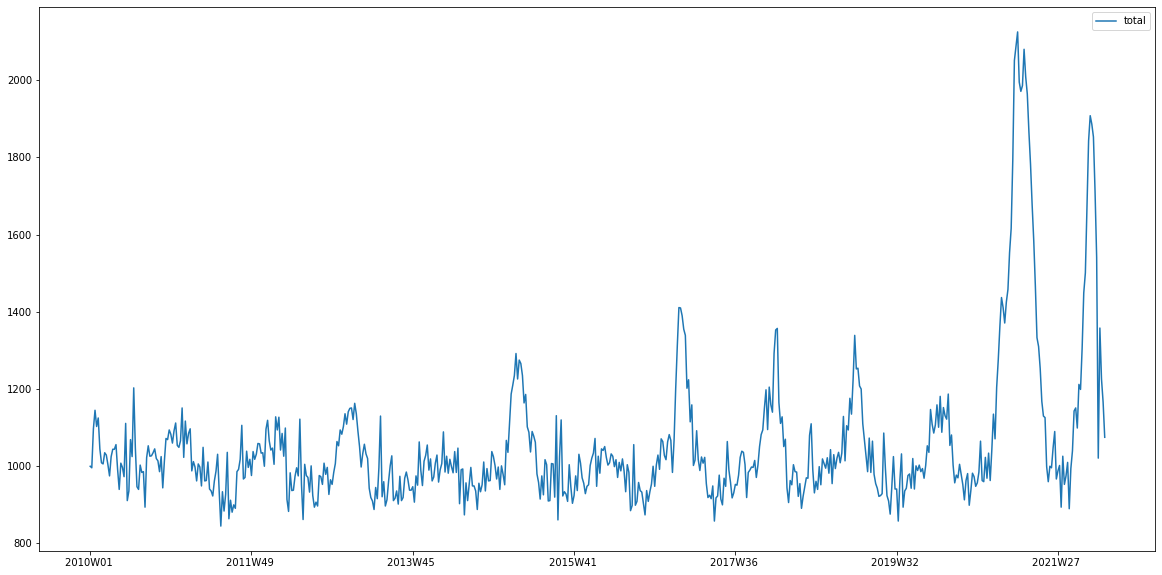

In [43]:
total.plot(figsize=(20,10))

In [44]:
weeks = pd.DataFrame(index=range(1, 54))
for index, row in total.iterrows():
#     print(index, row["total"])
    w = extract_week(index)
    y = extract_year(index)
    weeks.at[w, y]=row["total"]

weeks


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,1000.0,1092.0,1059.0,1083.0,1028.0,1112.0,1072.0,1411.0,1094.0,1105.0,1147.0,2089.0,1358.0
2,996.0,1112.0,1058.0,1103.0,1055.0,1187.0,948.0,1410.0,1150.0,1094.0,1109.0,2125.0,1226.0
3,1097.0,1054.0,1034.0,1136.0,990.0,1210.0,1026.0,1390.0,1198.0,1176.0,1086.0,1995.0,1166.0
4,1145.0,1049.0,1035.0,1109.0,1019.0,1235.0,982.0,1355.0,1095.0,1135.0,1107.0,1971.0,1075.0
5,1103.0,1066.0,1000.0,1141.0,962.0,1292.0,1045.0,1339.0,1205.0,1224.0,1159.0,1986.0,NaN
6,1125.0,1151.0,1096.0,1150.0,972.0,1226.0,1041.0,1202.0,1159.0,1339.0,1101.0,2080.0,NaN
7,1045.0,1023.0,1119.0,1151.0,1008.0,1275.0,1051.0,1224.0,1140.0,1252.0,1181.0,2009.0,NaN
8,1009.0,1117.0,1066.0,1121.0,1029.0,1266.0,1023.0,1115.0,1292.0,1254.0,1088.0,1964.0,NaN
9,1006.0,1058.0,1042.0,1163.0,959.0,1235.0,1003.0,1159.0,1353.0,1208.0,1152.0,1866.0,NaN
10,1035.0,1085.0,1047.0,1136.0,991.0,1164.0,1009.0,1002.0,1357.0,1200.0,1131.0,1782.0,NaN


In [45]:
weeks["avg"] = weeks[precovid].mean(axis=1)
weeks

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg
1,1000.0,1092.0,1059.0,1083.0,1028.0,1112.0,1072.0,1411.0,1094.0,1105.0,1147.0,2089.0,1358.0,1105.6
2,996.0,1112.0,1058.0,1103.0,1055.0,1187.0,948.0,1410.0,1150.0,1094.0,1109.0,2125.0,1226.0,1111.3
3,1097.0,1054.0,1034.0,1136.0,990.0,1210.0,1026.0,1390.0,1198.0,1176.0,1086.0,1995.0,1166.0,1131.1
4,1145.0,1049.0,1035.0,1109.0,1019.0,1235.0,982.0,1355.0,1095.0,1135.0,1107.0,1971.0,1075.0,1115.9
5,1103.0,1066.0,1000.0,1141.0,962.0,1292.0,1045.0,1339.0,1205.0,1224.0,1159.0,1986.0,NaN,1137.7
6,1125.0,1151.0,1096.0,1150.0,972.0,1226.0,1041.0,1202.0,1159.0,1339.0,1101.0,2080.0,NaN,1146.1
7,1045.0,1023.0,1119.0,1151.0,1008.0,1275.0,1051.0,1224.0,1140.0,1252.0,1181.0,2009.0,NaN,1128.8
8,1009.0,1117.0,1066.0,1121.0,1029.0,1266.0,1023.0,1115.0,1292.0,1254.0,1088.0,1964.0,NaN,1129.2
9,1006.0,1058.0,1042.0,1163.0,959.0,1235.0,1003.0,1159.0,1353.0,1208.0,1152.0,1866.0,NaN,1118.6
10,1035.0,1085.0,1047.0,1136.0,991.0,1164.0,1009.0,1002.0,1357.0,1200.0,1131.0,1782.0,NaN,1102.6


In [46]:
week_diff = pd.DataFrame(index=range(1, 54))
for i in weeks.columns:
    if (i == 'avg'):
        continue
    week_diff[i]=weeks[i]-weeks['avg']
    
week_diff

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,-105.6,-13.6,-46.6,-22.6,-77.6,6.4,-33.6,305.4,-11.6,-0.6,41.4,983.4,252.4
2,-115.3,0.7,-53.3,-8.3,-56.3,75.7,-163.3,298.7,38.7,-17.3,-2.3,1013.7,114.7
3,-34.1,-77.1,-97.1,4.9,-141.1,78.9,-105.1,258.9,66.9,44.9,-45.1,863.9,34.9
4,29.1,-66.9,-80.9,-6.9,-96.9,119.1,-133.9,239.1,-20.9,19.1,-8.9,855.1,-40.9
5,-34.7,-71.7,-137.7,3.3,-175.7,154.3,-92.7,201.3,67.3,86.3,21.3,848.3,NaN
6,-21.1,4.9,-50.1,3.9,-174.1,79.9,-105.1,55.9,12.9,192.9,-45.1,933.9,NaN
7,-83.8,-105.8,-9.8,22.2,-120.8,146.2,-77.8,95.2,11.2,123.2,52.2,880.2,NaN
8,-120.2,-12.2,-63.2,-8.2,-100.2,136.8,-106.2,-14.2,162.8,124.8,-41.2,834.8,NaN
9,-112.6,-60.6,-76.6,44.4,-159.6,116.4,-115.6,40.4,234.4,89.4,33.4,747.4,NaN
10,-67.6,-17.6,-55.6,33.4,-111.6,61.4,-93.6,-100.6,254.4,97.4,28.4,679.4,NaN


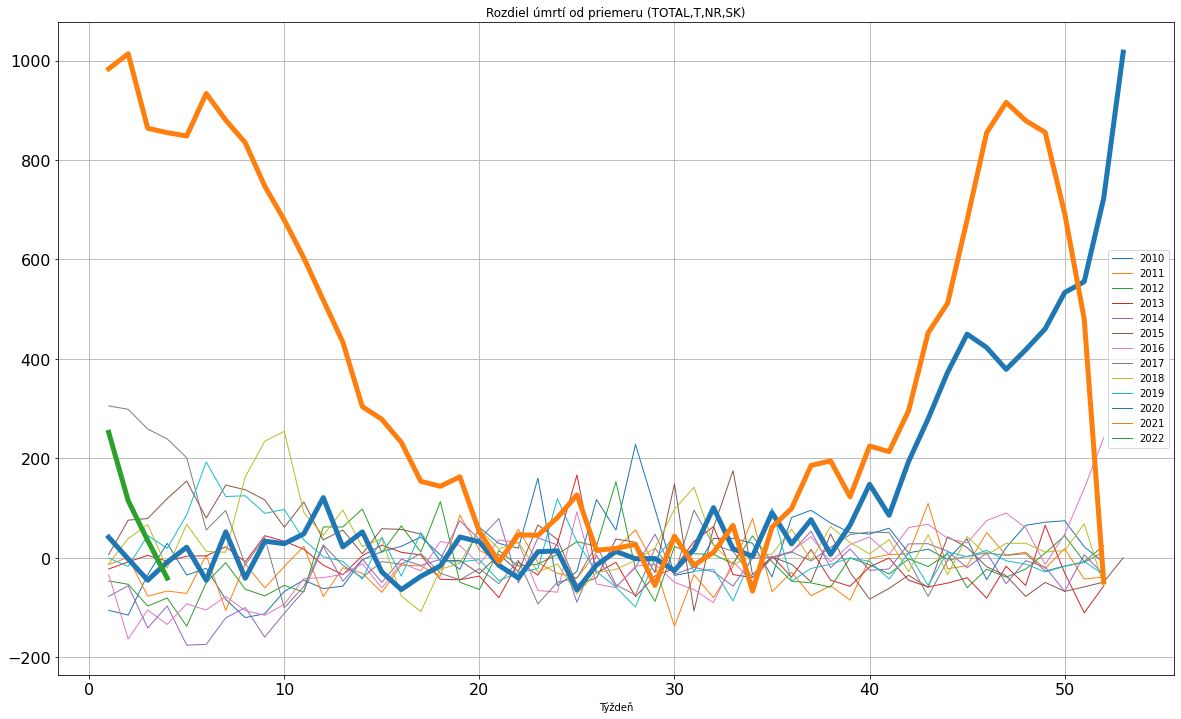

In [50]:
# week_diff.plot(figsize=(20,10))
plot2020(week_diff, 'Rozdiel úmrtí od priemeru (' + KEY + ')')

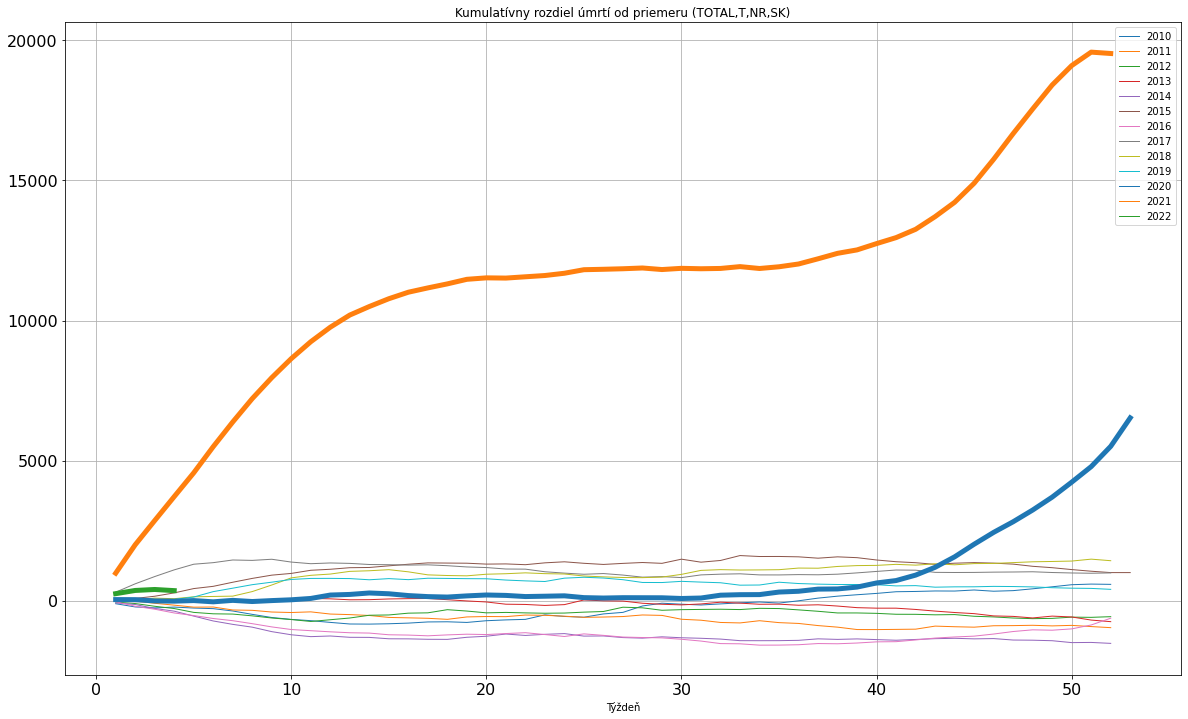

In [51]:
plot2020(week_diff.cumsum(), 'Kumulatívny rozdiel úmrtí od priemeru (' + KEY + ')')